In [8]:
import pandas as pd
import requests
import os
from get_weather_function import get_weather_data
from pipeline_cleaning import clean_data
from pipeline_cleaning import transforming_data
from sklearn.decomposition import PCA

In [12]:
file_csv = '../raw_data/final_df.csv'
df = pd.read_csv(file_csv)
clean_df = clean_data(df.copy())
df_train, df_val, df_test = transforming_data(clean_df.copy())

/tmp/ipykernel_325737/1375342885.py:2: DtypeWarning: Columns (53,62,71,80,89,98,107,116,122,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_csv)
/home/roblawson/code/harlqeuinht/which_horse/notebook/pipeline_cleaning.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['finish_position'].fillna(df['Place'], inplace=True)
/home/roblawson/code/harlqeuinht/which_horse/notebook/pipeline_cleaning.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and w

In [21]:
df_train.columns

Index(['barrier_1', 'barrier_2', 'barrier_3', 'barrier_4', 'barrier_5',
       'barrier_6', 'barrier_7', 'barrier_8', 'barrier_9', 'barrier_10',
       'barrier_11', 'barrier_12', 'barrier_13', 'barrier_14', 'barrier_15',
       'barrier_16', 'barrier_17', 'barrier_18', 'barrier_19', 'barrier_20',
       'track_condition_FAST', 'track_condition_FIRM', 'track_condition_GOOD',
       'track_condition_GOOD TO FIRM', 'track_condition_GOOD TO SOFT',
       'track_condition_HEAVY', 'track_condition_SOFT',
       'track_condition_STANDARD', 'track_condition_STANDARD TO FAST',
       'track_condition_STANDARD TO SLOW', 'race_type_NATIONAL_HUNT_FLAT',
       'track_type_TURF', 'race_class_normalised_Claiming',
       'race_class_normalised_Conditions', 'race_class_normalised_Grade 1',
       'race_class_normalised_Grade 2', 'race_class_normalised_Group 1',
       'race_class_normalised_Group 2', 'race_class_normalised_Group 3',
       'race_class_normalised_Handicap', 'race_class_normalised_Lis

In [40]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

In [27]:
y = df_train['1_min_']
X = df_train.drop(columns=['1_min_', 'place'])

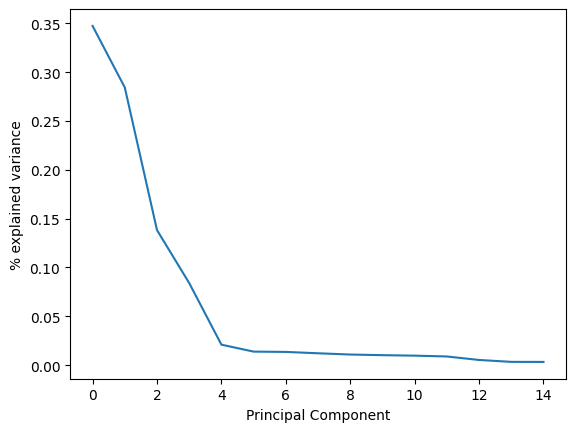

In [35]:
pca =PCA(n_components=15)
pca.fit_transform(X)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

In [37]:
pca =PCA(n_components=4)
pca.fit_transform(X)

array([[-7.35039108,  1.30812814,  1.19820064,  0.22033159],
       [-5.89000995,  0.59406694, -0.32622677,  1.16761554],
       [ 9.60669003,  6.07367116,  1.70231595,  0.92193926],
       ...,
       [10.60746474,  9.07778374,  4.09692728, -0.2452678 ],
       [-1.63173592, -2.55312648, -1.02665323, -0.77443272],
       [-1.69066659, -2.68469558,  5.04976801, -0.52904797]])

In [38]:
from sklearn.pipeline import make_pipeline

In [70]:
def dropthemic(tuple):
    df = tuple[0]
    df.drop(columns=['1_min_', 'place'])
    return df

In [71]:
pca_pipeline = make_pipeline(FunctionTransformer(clean_data), FunctionTransformer(transforming_data),FunctionTransformer(dropthemic),PCA(n_components=4))

In [72]:
df.columns

Index(['meeting_id', 'meeting_name', 'date', 'country_code', 'event_number',
       'distance', 'distance_unit', 'distance_furlongs',
       'distance_raw_furlongs', 'race_class',
       ...
       '10 mins', '5 mins', '3 mins', '2 mins', '1 min ', 'Post Time',
       'Last Traded Price', 'temperature_2m_mean', 'precipitation_sum',
       'wind_speed_10m_max'],
      dtype='object', length=140)

In [74]:
pca_pipeline.fit(df.copy())


/home/roblawson/code/harlqeuinht/which_horse/notebook/pipeline_cleaning.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['finish_position'].fillna(df['Place'], inplace=True)
/home/roblawson/code/harlqeuinht/which_horse/notebook/pipeline_cleaning.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['PU' 'PU' 'UR' 'PU' 'PU' 'PU' 'UR' 'PU' 'SU' 'UR' 'UR' 'RR' 'PU' 'F' 'PU'
 'F' 'PU' 'PU' 'PU' 'PU' 'PU' 'PU' 'F' 'PU' 'PU' 'BD' 'F' 'RR' 'PU' 

ValueError: could not convert string to float: 'PU'

In [ ]:
columns_to_drop = ['meeting_name', 'date', 'event_number', 'race_class_normalised', 'finish_position', 'jockey_id', 'tainer_id', ''  ]
cat_columns = ['race_class', 'track_condition', 'race_type', 'track_type', 'barrier', 'gear',
quant_columns = ['distance', 'total_prize_money', 'margin', 'jockey_allowance', 'handicap_weight', 'dslr',  ]


target = ['win_or_lose']